In [1]:
ITERATIONS = 100
import random
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
def derivative(x):
    return 4*(x**3)

In [3]:
# define states and actions
states = []

def init_states():
    curr_state = 0
    states = []
    while curr_state <= 1.05:
        #rounding
        round_state = round(curr_state*40)/40
        states.append(round_state)
        curr_state += 0.025
        
    return states

def init_actions():
    all_actions = []
    curr_action = 0

    while curr_action <= 2:
        round_action = round(curr_action*10)/10
        all_actions.append(round_action)
        curr_action += 0.1
        
    return all_actions
    
def init_state_action_map(states, all_actions):
    state_action_map = {}
    #print("actions are: ", all_actions)
    for state in states:

        valid_actions = []

        for action in all_actions:
            update_val = state - derivative(state)*action

            if update_val >= 0:
                valid_actions.append(action)
            else:
                break

        state_action_map[state] = valid_actions
        
    return state_action_map
        


In [4]:
def pick_action(state, state_action_map, eps, Q_map):
    actions = state_action_map[state]
    
    if random.random() < eps:
        return random.choice(actions)
    
    else:
        max_val = None
        best_action = None
        for action in actions:
            key = str(state) + "," + str(action)
            
            if max_val is None:
                max_val = Q_map[key]
                best_action = action
                
            elif Q_map[key] > max_val:
                best_action = action
                max_val = Q_map[key]
        
        return best_action

def reward_state(state):
    return (state**4)*-1

def get_next_state(state, action):
    new_state = state - action*derivative(state)
    #round to nearest 0.05
    round_state = round(new_state*40)/40
    return round_state

def get_max_q_val(state, state_action_map, Q_map):
    actions = state_action_map[state]
    
    max_val = None
    for action in actions:
        key = str(state) + "," + str(action)
        
        if max_val is None:
            max_val = Q_map[key]
        else:
            max_val = max(max_val, Q_map[key])
            
    return max_val
        

def Q_learning(states, state_action_map, gamma, alpha):
        Q_map = {}
        
        #set all initial state action pairs equal to 0
        for state in state_action_map:
            actions = state_action_map[state]
            
            for action in actions:
                key = str(state) + "," + str(action)
                Q_map[key] = 0

        for i in range(700000):
            state = random.choice(states)
            eps = 0.25
            
            same_state_counter = 0
            
            while same_state_counter < 5:
                action = pick_action(state, state_action_map, eps, Q_map)
                next_state = get_next_state(state, action)
                
                key = str(state) + "," + str(action)
                
                next_state_q = get_max_q_val(next_state, state_action_map, Q_map)
                curr_q = Q_map[key]
                outlook = gamma*next_state_q - curr_q
                Q_map[key] = Q_map[key] + alpha*(reward_state(state) + gamma*outlook)
                
                if state == next_state:
                    same_state_counter+=1
                    
                state = next_state
            
        return Q_map
    
def plot_values(x_vals, y_label_str, title_str):
    iterations = [i for i in range(len(x_vals))]
    plt.plot(iterations, x_vals)
    plt.xlabel("Num Iterations")
    plt.ylabel(y_label_str)
    plt.title(title_str)
    plt.show()
        
    

state is:  1.0
step size is:  0.1
state is:  0.2
step size is:  1.4
state is:  0.15
step size is:  1.7
state is:  0.125
step size is:  1.9
state is:  0.1
step size is:  1.9
state is:  0.1
step size is:  1.9
state is:  0.1
step size is:  1.9
state is:  0.1
step size is:  1.9
state is:  0.1
step size is:  1.9


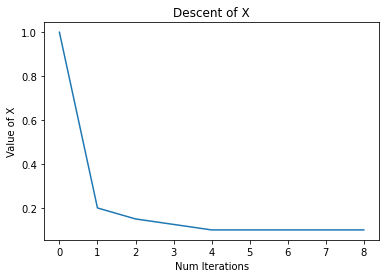

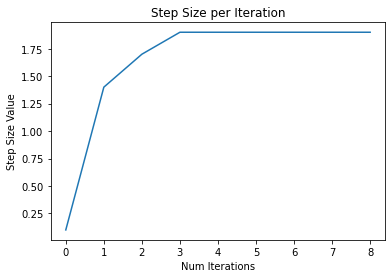

In [5]:
def main():
    states = init_states()
    actions = init_actions()
    state_action_map = init_state_action_map(states, actions)
    gamma = 1
    alpha = 0.6
    q_map_result = Q_learning(states, state_action_map, gamma, alpha)
    
    #print step size at each iteration
    same_state_counter = 0

    state = 1.0
    descent_states = []
    step_sizes = []
    while same_state_counter < 5:
        actions = state_action_map[state]

        max_val = None
        best_action = None
        for action in actions:
            key = str(state) + "," + str(action)
            if max_val is None:
                max_val = q_map_result[key]
                best_action = action
            elif q_map_result[key] > max_val:
                max_val = q_map_result[key]
                best_action = action
        print("state is: ", state)
        descent_states.append(state)
        print("step size is: ", best_action)
        step_sizes.append(best_action)
        next_state = get_next_state(state, action)

        if state == next_state:
            same_state_counter+=1

        state = next_state
        
    plot_values(descent_states, "Value of X", "Descent of X")
    plot_values(step_sizes, "Step Size Value", "Step Size per Iteration")
    
if __name__ == "__main__":
    main()